<a href="https://colab.research.google.com/github/secant78/Crop-Classification-Using-KNN-and-SVM/blob/main/Project_Initial_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os
import math
import string
#import data set to list'
import glob
import pandas as pd
import numpy as np


#"/content/drive/My Drive/"
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
fileTrain = r'/content/drive/My Drive/CISC 684/forest_mapping/WinnipegDataset.txt'
#fileTest = r'/content/drive/My Drive/CISC 684/forest_mapping/testing.csv'

dataTrain = pd.read_csv(fileTrain) #opens the file in read mode
#dataTest = pd.read_csv(fileTest)
 #puts the file into an array
        #words['a'] = words['a'].str.join(" ") 
        #print(words)


dataTrain.head()
#dataTest.head()

#pcaData = pd.read_csv(filePCA)

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,0.04239,3.3253,3.3677,0.35631,0.058490,0.58520,0.24150,0.51934,0.23916,-0.62424,-0.81493,-0.70844,-0.65641,-0.19568,-0.63160,0.091945,0.026703,0.005017,0.62019,0.68370,44.369,0.42402,0.19617,0.25967,0.12013,0.054561,0.16226,-11.923,-12.823,-21.407,...,0.13580,0.650770,6711,6143,4570,5064,8212,0.28493,1.7969,1.3442,-0.61941,0.54346,0.42738,0.14683,0.144130,0.58593,0.23712,1.6216,0.23712,294110.0,0.051277,2199.4,92560.0,1.1081,48.444,3.13580,0.57778,2.44440,1.11110,1.8310,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,0.22842,3.0360,3.2644,0.34295,0.060525,0.59652,0.25249,0.50796,0.23955,-0.57229,-0.74854,-0.64839,-0.62810,-0.18825,-0.55448,0.115710,0.031183,0.006051,0.60356,0.67496,44.992,0.40738,0.19618,0.26758,0.12886,0.052298,0.15826,-11.096,-11.805,-20.335,...,0.30864,0.104830,6274,5084,3297,3777,8214,0.42716,2.4914,1.5420,-0.64500,0.92501,0.64071,0.21322,0.235370,0.75089,0.37003,2.1747,0.37003,412400.0,0.067854,2338.4,100280.0,1.1456,49.778,0.39506,0.46667,1.33330,1.11110,1.2149,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,0.44978,2.7687,3.2185,0.34489,0.061731,0.59338,0.26362,0.49870,0.23768,-0.53347,-0.70253,-0.58846,-0.61836,-0.17804,-0.48642,0.127130,0.032382,0.006162,0.58683,0.68024,45.466,0.39919,0.18764,0.28105,0.13211,0.048473,0.14878,-10.829,-11.377,-19.902,...,0.30864,0.613940,6215,5035,3033,3837,8588,0.47801,2.8315,1.6601,-0.70049,1.03530,0.71699,0.24814,0.260810,0.80946,0.38237,2.2382,0.38237,439570.0,0.117030,3321.3,128320.0,1.2651,49.444,0.24691,0.61111,0.77778,0.77778,1.3689,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,0.66378,2.2942,2.9580,0.32760,0.067825,0.60457,0.28135,0.47717,0.24148,-0.50405,-0.66998,-0.52543,-0.61169,-0.17507,-0.43576,0.127200,0.031091,0.006040,0.57769,0.67468,46.654,0.38976,0.18793,0.28492,0.13738,0.047480,0.14701,-11.056,-11.263,-19.529,...,0.16049,0.064018,6836,5745,4212,4534,7691,0.29228,1.8260,1.3640,-0.47512,0.65772,0.43840,0.15396,0.144830,0.60147,0.25824,1.6963,0.25824,296240.0,0.036817,1748.1,80640.0,1.0764,50.667,0.88889,0.61111,0.77778,0.77778,1.8892,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,0.83143,2.1756,3.0070,0.31701,0.069483,0.61351,0.28768,0.47476,0.23756,-0.50314,-0.68221,-0.50731,-0.59134,-0.17505,-0.45195,0.131550,0.031960,0.006439,0.57937,0.66460,46.828,0.38505,0.19432,0.27955,0.14108,0.048950,0.15156,-10.932,-11.109,-19.278,...,0.20988,0.657600,6682,5883,4434,4627,7072,0.22927,1.5949,1.3268,-0.40120,0.52776,0.34389,0.14045,0.091779,0.53551,0.20899,1.5284,0.20899,232610.0,0.021300,1365.4,69540.0,1.0435,51.222,0.39506,0.56667,1.66670,1.00000,1.7351,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


In [19]:
from sklearn.model_selection import train_test_split

X = dataTrain.iloc[:,1:].values
y = dataTrain.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, random_state=0)

print(X_train.shape)
print(X_test.shape)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



(325801, 174)
(33, 174)


In [18]:
X_train

array([[-13.559  , -21.407  , -11.404  , ...,   1.677  ,   0.20988,
          0.65422],
       [-12.802  , -20.335  , -10.399  , ...,   0.84869,   0.50617,
         -0.18898],
       [-12.431  , -19.902  , -10.074  , ...,   1.273  ,   0.30864,
          0.10483],
       ...,
       [ -1.927  , -11.416  ,  -2.4354 , ...,   1.273  ,   0.30864,
          0.31623],
       [  0.12483, -10.144  ,  -0.62193, ...,   0.34883,   0.80247,
          0.18898],
       [  0.20063, -10.05   ,  -0.59892, ...,   2.0432 ,   0.1358 ,
          0.72732]])

In [20]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

from sklearn.neighbors import KNeighborsClassifier



from sklearn import preprocessing

KNN = KNeighborsClassifier(n_neighbors=5)

model = KNN.fit(X_train, y_train)

pred=model.predict(X_test)


In [7]:
model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [21]:
print(confusion_matrix(pred, y_test))
print(classification_report(y_test, pred, digits=3))

[[ 5  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0 11]]
              precision    recall  f1-score   support

           1      1.000     1.000     1.000         5
           2      1.000     1.000     1.000         1
           3      1.000     1.000     1.000         5
           4      1.000     1.000     1.000        10
           5      1.000     1.000     1.000         1
           6      1.000     1.000     1.000        11

    accuracy                          1.000        33
   macro avg      1.000     1.000     1.000        33
weighted avg      1.000     1.000     1.000        33



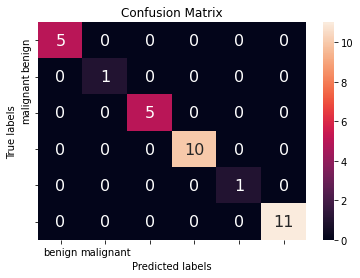

<Figure size 432x288 with 0 Axes>

In [22]:
import seaborn as sn
import matplotlib.pyplot as plt

cm_lda = confusion_matrix(pred, y_test)
cm_lda.astype(int)

df_cm = pd.DataFrame(cm_lda, range(6), range(6))

ax = plt.subplot()
plt.figure()
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', ax = ax)


ax.set_title('Confusion Matrix'); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['benign', 'malignant']); ax.yaxis.set_ticklabels(['benign', 'malignant']);


In [20]:
from math import sqrt

In [23]:
def predict_test_class(NN_df, y_train):

  y_train_df = pd.DataFrame()
  y_train_df['counter'] = range(y_train.shape[0])
  y_train_df['y_vals'] = y_train
 

  y_val_df = pd.merge(y_train_df, NN_df)
 

  max_y_val = y_val_df['y_vals'].mode()
  return max_y_val

  

In [24]:
def distance_to_center(train,test,y_train, k):



  distance = np.zeros((1, train.shape[0]))

  for train_row in range(train.shape[0]):
    distance[0,train_row] = (np.linalg.norm((train[train_row,:] - test[:])))**2


  distance_df = pd.DataFrame()
  distance_df['counter'] = range(distance.shape[1])
  distance_df['dist'] = distance[0,:]

  distance_df = distance_df.sort_values(by=['dist'])


  nearest_neighbors = distance_df.iloc[0:k,:]
  predicted_class = predict_test_class(nearest_neighbors,y_train)
 
   

  return predicted_class


In [27]:
def get_predictions(X_train,X_test,y_train,y_test):

  k = 5
  pred_class = np.zeros((1, X_test.shape[0]))
  for i in range(X_test.shape[0]):
    pred_class[0,i] = distance_to_center(X_train,X_test[i,:],y_train, k)
    print(pred_class)

  return pred_class


In [28]:
pred = get_predictions(X_train,X_test,y_train,y_test)

[[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[3. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[3. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[3. 4. 1. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[3. 4. 1. 6. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[3. 4. 1. 6. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[3. 4. 1. 6. 1. 2. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[3. 4. 1. 6. 1. 2. 6. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[3. 4. 1. 6. 1. 2. 6. 6. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[3. 4. 1. 6. 1. 2. 6. 6. 6. 6. 0. 0. 0. 0. 0. 0. 0. 0.

In [31]:
pred.shape

(1, 33)

In [32]:
def measure_accuracy(predicted, actual):

  nCorrect = 0
  nIncorrect = 0

  for i in range(predicted.shape[1]):
    if(predicted[0,i] == actual[i]):
      nCorrect += 1

    else:
      nIncorrect +=1

  return nCorrect/predicted.shape[1]




In [33]:
measure_accuracy(pred,y_test)

1.0

The accuracy for KNN for 33 test samples is 100%